# GRIP : The Sparks Foundation

## Data Science and Business Analytics Internship

## Author : Akkena Nitya

### TASK 1 : Prediction Using Supervised ML

#### In this task we have to Predict the percentage of an student based on the number of study hours. The task has two variables where the feature is the no. of hours studied and the target value is the percentage score. This can be solved using simple linear regression supervised Machine Learning Algorithm.

## STEP 1- Importing the dataset

##### In this step, we will import the dataset through the link with the help of pandas library and then we will observe the data

In [23]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data from remote link
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [3]:
# now let's observe the dataset
df.shape

(25, 2)

In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### As we can see we do not have any null values in our dataset so we can now move on to our next step.

## STEP 2- Visualizing the dataset

##### In this step we will plot the dataset to check whether we can observe any relation between the two variables or not

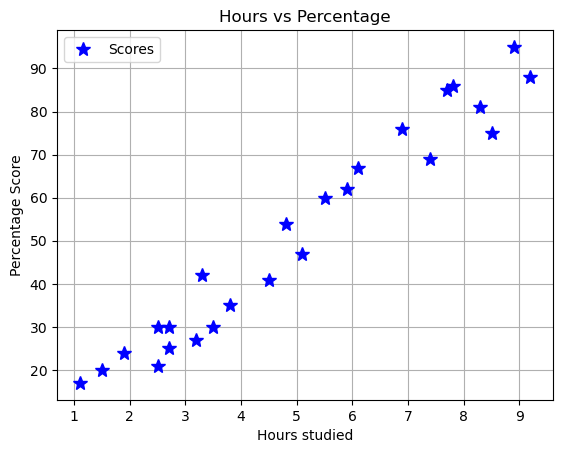

In [8]:
# Plotting the dataset

df.plot(x='Hours', y='Scores', color='Blue', style= '*', markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [9]:
# we can also use .corr to determine the corelation between the variables

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## STEP 3- Data Preparation

##### In this step, we will divide the data into "features" (input) and "labels" (output). After that we will split the whole dataset into 2 parts- testing data and training data.

In [10]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
# using iloc function we will divide the data

X=df.iloc[:, :1].values
Y=df.iloc[:, 1:].values

In [12]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

## STEP 4- Training the Algorithm

##### we have splited our data into training and testing sets and now we will train our Model.

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

## STEP 5- Visualizing the model

##### After training the model, now its time to visualize it.

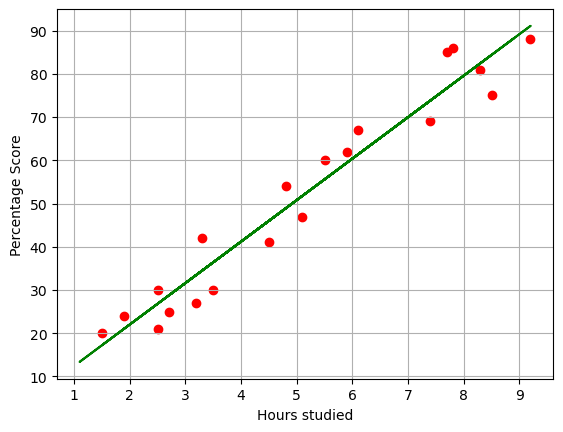

In [14]:
# Plotting for the training data

m=model.coef_
c=model.intercept_
line=m*X+c
plt.scatter(X_train, Y_train, color="red")
plt.plot(X, line, color="green")
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

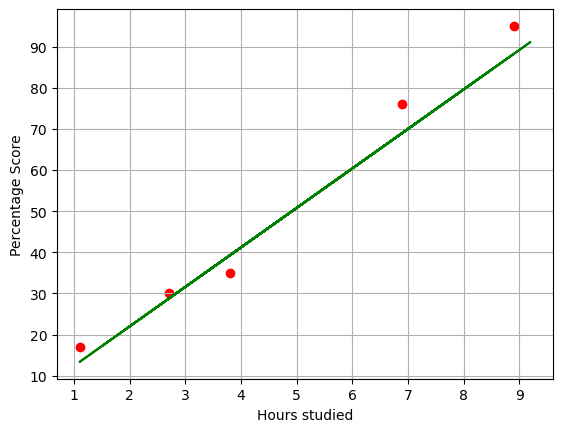

In [16]:
# Plotting for the testing data

m=model.coef_
c=model.intercept_
line=m*X+c
plt.scatter(X_test, Y_test, color="red")
plt.plot(X, line, color="green")
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

## STEP 6- Making Prediction

##### Now we have trained our algorithm, It's time to make some prediction

In [17]:
print(X_test) #Testing data - In Hours
Y_pred = model.predict(X_test) #Predicting the scores

[[8.9]
 [2.7]
 [6.9]
 [3.8]
 [1.1]]


In [19]:
# Comparing Actual vs Predicted

comp= pd.DataFrame({'Actual':[Y_test],'Predicted':[Y_pred]})
comp

,Actual,Predicted
0,"[[95], [30], [76], [35], [17]]","[[88.21139357388516], [28.718452665057836], [6..."


In [20]:
#Testing with your own data

Hours= 9.25
own_pred= model.predict([[Hours]])
print("the predicted score if a person studies for", Hours, "Hours is", own_pred[0])

the predicted score if a person studies for 9.25 Hours is [91.56986604]


## STEP 7- Evaluating the model

##### In the last step, we are going to evaluate our trained model by calculating mean absolute error

In [21]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.5916495300630285
